iterations : 0.0%
iterations : 50.0%
iterations : 100.0%


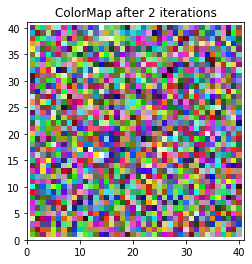

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import subprocess as sp


class ColorMap:
    def __init__(self, data, iterations=1000, learningrate=0.01):
        self.iterations = iterations
        self.learningrate = learningrate
        self.matrix = np.array([40, 40])
        self.radius = max(self.matrix[0], self.matrix[1]) / 2
        self.time_constant = iterations / np.log(self.radius)
        self.raw_data = data
        self.data = None
        self.network = np.random.random((self.matrix[0], self.matrix[1], self.raw_data.shape[0]))

    def calculate(self, t):
        m = self.raw_data.shape[0]
        element = np.array([0, 0])
        distance = np.iinfo(np.int).max

        for x in range(self.network.shape[0]):
            for y in range(self.network.shape[1]):
                w = self.network[x, y, :].reshape(m, 1)
                distanceroot = np.sum((w - t) ** 2)
                distanceroot = np.sqrt(distanceroot)
                if distanceroot < distance:
                    distance = distanceroot  
                    element = np.array([x, y]) 

        net = self.network[element[0], element[1], :].reshape(m, 1)
        return net, element

    @staticmethod
    def decay_radius(radius, i, time_constant):
        return radius * np.exp(-i / time_constant)

    @staticmethod
    def decay_learningrate(initial_learningrate, i, n_iterations):
        return initial_learningrate * np.exp(-i / n_iterations)

    @staticmethod
    def calculate_influence(distance, radius):
        return np.exp(-distance / (2 * (radius ** 2)))

    def show_iteration(self, i):
        # sp.call('clear', shell=True)
        print("iterations : " + str(i/self.iterations*100) + "%")

    def normalize(self):
        data = self.raw_data
        if True:
            if False:
                col_maxes = self.raw_data.max(axis=0)
                data = self.raw_data / col_maxes[np.newaxis, :]
            else:
                data = self.raw_data / data.max()
        self.data = data

    def train(self):
        for i in range(self.iterations + 1):
            self.show_iteration(i)
            t = self.data[:, np.random.randint(0, self.raw_data.shape[1])].reshape(np.array([self.raw_data.shape[0], 1]))
            net, element = self.calculate(t)
            r = self.decay_radius(self.radius, i, self.time_constant)
            new_learningrate = self.decay_learningrate(self.learningrate, i, self.iterations)

            for x in range(self.network.shape[0]):
                for y in range(self.network.shape[1]):
                    w = self.network[x, y, :].reshape(self.raw_data.shape[0], 1)
                    w_dist = np.sum((np.array([x, y]) - element) ** 2)
                    w_dist = np.sqrt(w_dist)

                    if w_dist <= r:
                        influence = self.calculate_influence(w_dist, r)
                        new_w = w + (new_learningrate * influence * (t - w))
                        self.network[x, y, :] = new_w.reshape(1, 3)

    def show(self):
        fig = plt.figure()

        ax = fig.add_subplot(111, aspect='equal')
        ax.set_xlim((0, self.network.shape[0] + 1))
        ax.set_ylim((0, self.network.shape[1] + 1))
        ax.set_title('ColorMap after %d iterations' % self.iterations)

        for x in range(1, self.network.shape[0] + 1):
            for y in range(1, self.network.shape[1] + 1):
                ax.add_patch(patches.Rectangle((x - 0.5, y - 0.5), 1, 1,facecolor=self.network[x - 1, y - 1, :],edgecolor='none'))
        plt.show()

raw_data = np.random.randint(0, 255, (3, int(1600)))
network = ColorMap(data=raw_data, iterations=(2))
network.normalize()
network.train()
network.show()